In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import ToPILImage
from utils import load_image, add_noise, plot_image
import models

Using cache found in /Users/seanduffy/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


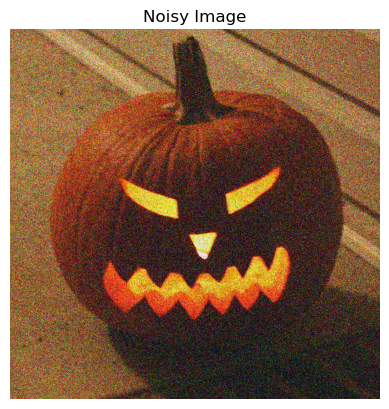

In [3]:
# Load and add noise
w = 1024
h = w
image_path = 'data/jack-o-lantern.jpg'
clean_image = load_image(image_path, target_size=(1024, 1024), tensor=True)
noisy_image = add_noise(clean_image, noise_factor=0.3).unsqueeze(0).to(device)
plot_image(noisy_image, title='Noisy Image')

# Random noise input to the network
#input_noise = torch.randn_like(noisy_image).to(device)

In [4]:
# Hyperparameters
z_shape = (1, 32, w, h)
z = torch.rand(z_shape).uniform_(0, 0.1).to(device)
nu = nd = [128, 128, 128, 128, 128]
ku = kd = [3, 3, 3, 3, 3]
ns = [4, 4, 4, 4, 4]
ks = [1, 1, 1, 1, 1]
sigma_p = 1 / 30
num_iter = 2000
lr = 0.01
upsampling = 'bilinear'

model = models.DeepImagePriorNet(nd=nd, kd=kd, nu=nu, ku=ku, ns=ns, ks=ks, d_in=z_shape, upsampling=upsampling).to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_function = nn.MSELoss()

torch.Size([1, 32, 1024, 1024])
torch.Size([1, 128, 512, 512])
torch.Size([1, 128, 256, 256])
torch.Size([1, 128, 128, 128])
torch.Size([1, 128, 64, 64])
torch.Size([1, 128, 32, 32])
torch.Size([1, 128, 64, 64]) + torch.Size([1, 128, 64, 64])  ( torch.Size([1, 128, 64, 64]) )
torch.Size([1, 128, 128, 128]) + torch.Size([1, 128, 128, 128])  ( torch.Size([1, 128, 128, 128]) )
torch.Size([1, 128, 256, 256]) + torch.Size([1, 128, 256, 256])  ( torch.Size([1, 128, 256, 256]) )
torch.Size([1, 128, 512, 512]) + torch.Size([1, 128, 512, 512])  ( torch.Size([1, 128, 512, 512]) )
Epoch [0/1000] Loss: 0.257334


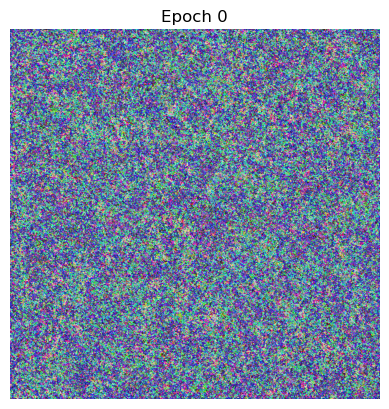

torch.Size([1, 32, 1024, 1024])
torch.Size([1, 128, 512, 512])
torch.Size([1, 128, 256, 256])
torch.Size([1, 128, 128, 128])
torch.Size([1, 128, 64, 64])
torch.Size([1, 128, 32, 32])
torch.Size([1, 128, 64, 64]) + torch.Size([1, 128, 64, 64])  ( torch.Size([1, 128, 64, 64]) )
torch.Size([1, 128, 128, 128]) + torch.Size([1, 128, 128, 128])  ( torch.Size([1, 128, 128, 128]) )
torch.Size([1, 128, 256, 256]) + torch.Size([1, 128, 256, 256])  ( torch.Size([1, 128, 256, 256]) )
torch.Size([1, 128, 512, 512]) + torch.Size([1, 128, 512, 512])  ( torch.Size([1, 128, 512, 512]) )
torch.Size([1, 32, 1024, 1024])
torch.Size([1, 128, 512, 512])
torch.Size([1, 128, 256, 256])
torch.Size([1, 128, 128, 128])
torch.Size([1, 128, 64, 64])
torch.Size([1, 128, 32, 32])
torch.Size([1, 128, 64, 64]) + torch.Size([1, 128, 64, 64])  ( torch.Size([1, 128, 64, 64]) )
torch.Size([1, 128, 128, 128]) + torch.Size([1, 128, 128, 128])  ( torch.Size([1, 128, 128, 128]) )
torch.Size([1, 128, 256, 256]) + torch.Size([1

KeyboardInterrupt: 

In [5]:
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    z += torch.randn_like(z) * sigma_p
    output = model(z)

    loss = loss_function(output, noisy_image)
    loss.backward()
    optimizer.step()

    if epoch % 25 == 0 or epoch == epochs - 1:
        print(f"Epoch [{epoch}/{epochs}] Loss: {loss.item():.6f}")
        with torch.no_grad():
            output_image = output
            plot_image(output_image, title=f"Epoch {epoch}")


In [ ]:
plot_image(noisy_image, title='Noisy Image')
plot_image(output_image, title='Final Output')